# Implementation for **AutoEncoder + SINDy**

### To discover spring pendulum dynanics (2nd order bivariate ODE) from high dimensional data

##### ORIGINAL PAPER PRESENTED ON YOUTUBE: 
##### https://www.youtube.com/watch?v=WHhDgxkiR9c&ab_channel=SteveBrunton

> LORENZ ATTRACTOR (1st order trivariate ODE)

> REACTION DIFFUSION (1st order bivariate PDE)

> SIMPLE PENDULUM (2st order univariate ODE)

## Physics solution of the **spring pendulum**

> Page 2-3 on:
https://scholar.harvard.edu/files/david-morin/files/cmchap6.pdf

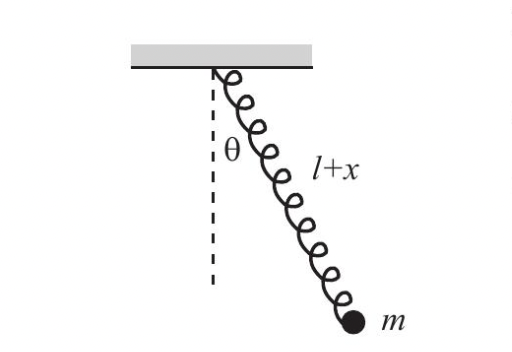

The kinetic energy may be broken up into the radial and tangential parts, so we have

$$
T=\frac{1}{2} m\left(\dot{x}^{2}+(\ell+x)^{2} \dot{\theta}^{2}\right)
$$

The potential energy comes from both gravity and the spring, so we have

$$
V(x, \theta)=-m g(\ell+x) \cos \theta+\frac{1}{2} k x^{2} \text {. }
$$

The Lagrangian is therefore

$$
L \equiv T-V=\frac{1}{2} m\left(\dot{x}^{2}+(\ell+x)^{2} \dot{\theta}^{2}\right)+m g(\ell+x) \cos \theta-\frac{1}{2} k x^{2} .
$$
There are two variables here, $x$ and $\theta$. As mentioned above, the nice thing about the Lagrangian method is that we can just use $\frac{d}{d t}\left(\frac{\partial L}{\partial \dot{z}}\right)=\frac{\partial L}{\partial z}$ twice, once with $x$ and once with $\theta$. So the two Euler-Lagrange equations are

$$
\frac{d}{d t}\left(\frac{\partial L}{\partial \dot{x}}\right)=\frac{\partial L}{\partial x} \quad \Longrightarrow \quad m \ddot{x}=m(\ell+x) \dot{\theta}^{2}+m g \cos \theta-k x
$$

and

$$
\begin{aligned}
& \frac{d}{d t}\left(\frac{\partial L}{\partial \dot{\theta}}\right)=\frac{\partial L}{\partial \theta} \quad \Longrightarrow \quad \frac{d}{d t}\left(m(\ell+x)^{2} \dot{\theta}\right)=-m g(\ell+x) \sin \theta \\
& \Longrightarrow \quad m(\ell+x)^{2} \ddot{\theta}+2 m(\ell+x) \dot{x} \dot{\theta}=-m g(\ell+x) \sin \theta \text {. } \\
& \Longrightarrow \quad m(\ell+x) \ddot{\theta}+2 m \dot{x} \dot{\theta}=-m g \sin \theta \text {. }
\end{aligned}
$$


Which is:
$$
\begin{aligned}
\ddot{x} &= (\ell+x) \dot{\theta}^{2}+ g \cos \theta-\frac{k}{m} x \\
\ddot{\theta} &= -\frac{g \sin \theta}{\ell+x} - \frac{2 \dot{x} \dot{\theta}}{\ell+x}
\end{aligned}
$$

Denoting $z := \ell + x$ , which is $x = z - \ell$ and $\dot{z} = \dot{x}$ and $\ddot{z} = \ddot{x}$ we get:
$$
\boxed{
\begin{aligned}
\ddot{z} &= z \dot{\theta}^{2} + g \cos \theta - \frac{k}{m} z + \frac{kl}{m} \\
\ddot{\theta} &= -g \frac{\sin \theta}{z} - 2 \frac{\dot{z} \dot{\theta}}{z}
\end{aligned}
}
$$

$$
\frac{d^2 z}{dt^2} = z \frac{dz}{dt}\frac{dz}{dt} + gcos\theta - \frac{k}{m}z + \frac{kl}{m}
$$

$$\frac{d^2 \theta}{dt^2} = -g\frac{sin\theta}{z} - \frac{2}{z} \frac{dz}{dt} \frac{d\theta}{dt}$$

# **Simulatation**

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plot_spring import spring

# Save Clean Data

In [2]:
# set no_drag to True to simulate without drag
no_drag = True
ksi = 100 # drag coefficient

# constants
g = 9.81 # m/s^2
l = 0.50 # m
m = 0.50 # kg ~ 5N 
k = 60.00 # N/m, spring constant
dt = 0.0005 # s (2000 fps simulation)

# start time
t = 0.00 # s

# total time
T = 20.00 # s

# initial conditions for z and theta (initial x = 0 ; thus initial z = l + x = 1.0)
z = l + 0.00 # m
theta = np.pi/4 # rad

# initial conditions for dz and dtheta (rest thus no initial velocity)
dz = 0.0 # m/s
dtheta = 0.0 # rad/s

# initial conditions for ddz and ddtheta
ddz = z*(dtheta**2) + g*np.cos(theta) - k*z/m  + k*l/m
ddtheta = -2*dz*dtheta/z - g*np.sin(theta)/z

def update_no_drag():
    # push variables to global scope
    global z, theta
    global dz, dtheta
    global ddz, ddtheta
    global t
    # update time
    t += dt
    # update dz and dtheta
    dz += ddz*dt
    dtheta += ddtheta*dt
    # update z and theta
    z += dz*dt
    theta += dtheta*dt
    # update ddz and ddtheta
    ddz = z*(dtheta**2) + g*np.cos(theta) - k*z/m  + k*l/m
    ddtheta = -2*dz*dtheta/z - g*np.sin(theta)/z

def update_wi_drag(): # NOT IMPLEMENTED
    raise NotImplementedError

data_df = pd.DataFrame(columns=['t', 'z', 'theta', 'dz', 'dtheta', 'ddz', 'ddtheta'])
# simulation loop
while t < T: # T seconds of simulation
    # save data using pandas.concat
    data_df = pd.concat([data_df, 
                         pd.DataFrame([[t, z, theta, dz, dtheta, ddz, ddtheta]], 
                                               columns=['t', 'z', 'theta', 'dz', 'dtheta', 'ddz', 'ddtheta'])], 
                         ignore_index=True)
    # update simulation
    if no_drag:
        update_no_drag()
    else:
        update_wi_drag()

# z and theta vs time from data_df
z = data_df['z']
theta = data_df['theta']
# transform z and theta to x and y, picture 64*64
x_64 = 64*(0.5 + z*np.sin(theta))
y_64 = 64*(1 - z*np.cos(theta))
# save x and y to data_df
data_df['x_64'] = x_64
data_df['y_64'] = y_64
data_df.describe()

,t,z,theta,dz,dtheta,ddz,ddtheta,x_64,y_64
count,40001.000000,40001.000000,40001.000000,40001.000000,40001.000000,40001.000000,40001.000000,40001.000000,40001.000000
mean,10.000000,0.590643,-0.009518,0.008354,-0.052439,0.025305,0.107600,31.687545,31.505447
std,5.773719,0.048386,0.553662,0.437318,2.042252,4.367164,8.069221,18.483055,6.395945
min,0.000000,0.497678,-0.824566,-0.894413,-3.065539,-9.378535,-14.125492,4.832257,20.046966
25%,5.000000,0.552356,-0.548192,-0.316228,-2.144228,-3.084113,-5.988716,12.701749,25.498321
50%,10.000000,0.589111,-0.015568,0.005390,-0.134642,0.008338,-0.030352,31.344311,31.786414
75%,15.000000,0.625533,0.528042,0.329189,2.115723,3.526761,6.495524,50.867457,37.721535
max,20.000000,0.687467,0.825112,0.891793,3.059965,7.526198,14.119694,59.151360,41.372583


In [3]:
# save data_df to csv
data_df.to_csv('clean_data_1000_fps.csv', index=False)

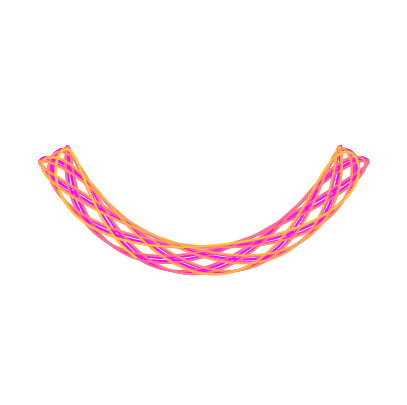

In [4]:
# visualize all data, 5 seconds
x = data_df['x_64']
y = data_df['y_64']
# plot x and y in gray scale
plt.figure(figsize=(5, 5))
# plot with a gradient from red to blue
col_idx = np.linspace(-0.2, 0.8, len(x))
colors = plt.cm.spring(col_idx)
plt.scatter(x, y, c=colors, marker='.', s=1, alpha=0.5)
plt.xlim(0, 64)
plt.ylim(0, 64)
plt.axis('off')
plt.show()

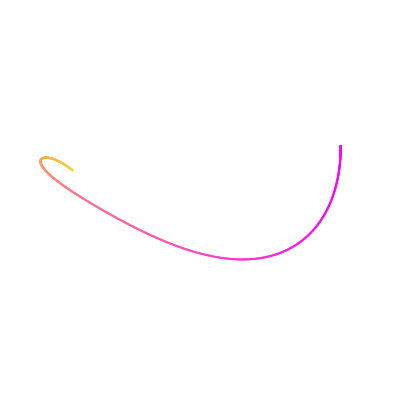

In [5]:
# visualize 2 seconds of data, 2000 frames
x = data_df['x_64']
y = data_df['y_64']
# plot x and y in gray scale
plt.figure(figsize=(5, 5))
# plot with a gradient from red to blue
col_idx = np.linspace(-0.2, 0.8, 2000)
colors = plt.cm.spring(col_idx)
plt.scatter(x[:2000], y[:2000], c=colors, marker='.', s=1, alpha=0.5)
plt.xlim(0, 64)
plt.ylim(0, 64)
plt.axis('off')
plt.show()

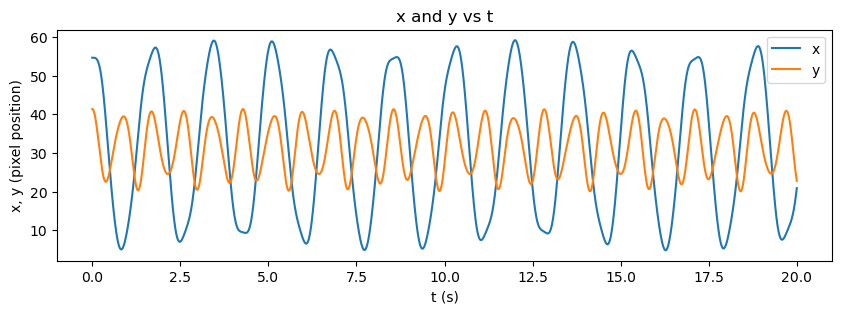

In [6]:
# sample x and y from data_df
x_all = data_df['x_64']
y_all = data_df['y_64']
t_all = data_df['t']

# plot x against t, y against t, on the same figure no subplots
plt.figure(figsize=(10, 3))
plt.plot(t_all, x_all, label='x')
plt.plot(t_all, y_all, label='y')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x, y (pixel position)')
plt.title('x and y vs t')
plt.show()

In [7]:
# original data 10000 fps, we convert to F fps
F = 60 # fps
film_length = int(T) # seconds
selected_frame_idx = np.linspace(0, len(x)-1, F*film_length).astype(int)
len(selected_frame_idx)

# save selected data to csv
data_df.iloc[selected_frame_idx].to_csv(f'clean_data_{F}_fps.csv', index=False)

### save images for training CNN AutoEncoder

In [8]:
# PATH = 'dot_image_data_clean/'
# # delete all files in PATH
# import os
# for filename in os.listdir(PATH):
#     os.remove(PATH + filename)
    
# # save inividual frames
# for i in selected_frame_idx:
#     plt.figure(figsize=(1, 1), dpi=64)
#     plt.scatter(x_all[i], y_all[i], c='k', marker='.', s=1, alpha=0.8)
#     plt.xlim(0, 64)
#     plt.ylim(0, 64)
#     plt.axis('off')
#     # save as grayscale image of size 64*64
#     plt.savefig(PATH + 'frame_{:05d}.png'.format(i), dpi=64, bbox_inches='tight', pad_inches=0)
#     plt.close()

# # generate video from frames
# import imageio
# import os
# os.environ['IMAGEIO_FFMPEG_EXE'] = '/opt/homebrew/bin/ffmpeg'

# # Set directory containing PNG files
# directory = 'dot_image_data_clean'

# # Get list of PNG files in directory
# files = sorted(os.listdir(directory))
# png_files = [os.path.join(directory, f) for f in files if f.endswith('.png')]

# # Create video writer object
# output_file = 'clean_dots_video.mp4'
# writer = imageio.get_writer(output_file, fps=F)

# # Write each PNG file as a frame in the video
# for png_file in png_files:
#     img = imageio.imread(png_file)
#     writer.append_data(img)

# # Close video writer
# writer.close()

## Save Clean Movie

In [9]:
# PATH = 'dot_image_data_clean_hi_res_wi_str/'
# # delete all files in PATH
# import os
# for filename in os.listdir(PATH):
#     os.remove(PATH + filename)
    
# # save inividual frames
# for i in selected_frame_idx:
#     plt.figure(figsize=(10, 10), dpi=64)
#     plt.scatter(x_all[i], y_all[i], c='k', marker='.', s=100, alpha=1)
#     # draw past 30 points if available
#     if i > 100:
#         plt.scatter(x_all[i-100:i], y_all[i-100:i], c='blue', marker='.', s=1, alpha=0.01)
#     else:
#         plt.scatter(x_all[:i], y_all[:i], c='blue', marker='.', s=1, alpha=0.01)
#     # plot all past points in cmap
#     col_idx = np.linspace(-0.2, 0.6, len(x_all))
#     colors = plt.cm.spring(col_idx)
#     plt.scatter(x_all[:i], y_all[:i], c=colors[:i], marker='.', s=1, alpha=0.1)
#     # draw a line connecting the (32,64) and (x,y), 10 spring knots, 5 spring width
#     plt.plot(*spring([32, 64], [x_all[i], y_all[i]], 10, 5), c="orange")
#     plt.xlim(0, 64)
#     plt.ylim(0, 64)
#     plt.axis('off')
#     # save as grayscale image of size 640*640
#     plt.savefig(PATH + 'frame_{:05d}.png'.format(i), dpi=64, bbox_inches='tight', pad_inches=0)
#     plt.close()

# # generate video from frames
# import imageio
# import os
# os.environ['IMAGEIO_FFMPEG_EXE'] = '/opt/homebrew/bin/ffmpeg'

# # Set directory containing PNG files
# directory = PATH[:-1]

# # Get list of PNG files in directory
# files = sorted(os.listdir(directory))
# png_files = [os.path.join(directory, f) for f in files if f.endswith('.png')]

# # Create video writer object
# output_file = 'clean_dots_video_hi_res_wi_str.mp4'
# writer = imageio.get_writer(output_file, fps=F)

# # Write each PNG file as a frame in the video
# for png_file in png_files:
#     img = imageio.imread(png_file)
#     writer.append_data(img)

# # Close video writer
# writer.close()

#### Low Resolution Image Data:     
        dot_image_data_clean/ ...
#### Low Resolution Video:          
        clean_dots_video.mp4

#### High Resolution Video of Spring Pendulum Dynamics: 
        clean_dots_video_hi_res_wi_str.mp4

#### High Resolution Image Data:
        dot_image_data_clean_hi_res_wi_str/ ...

# Simulate Noisy Data

### Add x-y frame shift noise

In [10]:
noisy_data_df = data_df[['t', 'x_64', 'y_64']].copy()

# set seed for reproducibility
np.random.seed(0)

# add noise to x_64 and y_64, x has more noise than y since camera is mounted and supported on table
noisy_data_df['x_64'] = noisy_data_df['x_64'] + np.random.normal(0, 0.2, len(noisy_data_df))
noisy_data_df['y_64'] = noisy_data_df['y_64'] + np.random.normal(0, 0.05, len(noisy_data_df))

# set seed for reproducibility
np.random.seed(0)

# infer z and theta from x and y
pivot = np.array([32, 64])
noisy_data_df['z'] = np.sqrt((noisy_data_df['x_64'] - pivot[0])**2 + (noisy_data_df['y_64'] - pivot[1])**2) / 64
noisy_data_df['theta'] = np.arctan((noisy_data_df['x_64'] - 32) / (64 - noisy_data_df['y_64']))

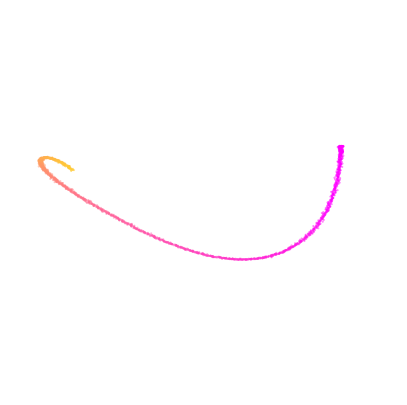

In [11]:
# visualize 2 seconds of data, 2000 frames
x = noisy_data_df['x_64']
y = noisy_data_df['y_64']
# plot x and y in gray scale
plt.figure(figsize=(5, 5))
# plot with a gradient from red to blue
col_idx = np.linspace(-0.2, 0.8, 2000)
colors = plt.cm.spring(col_idx)
plt.scatter(x[:2000], y[:2000], c=colors, marker='.', s=1, alpha=0.5)
plt.xlim(0, 64)
plt.ylim(0, 64)
plt.axis('off')
plt.show()

In [12]:
# sample x and y from data_df
x_all = noisy_data_df['x_64']
y_all = noisy_data_df['y_64']
t_all = noisy_data_df['t']
# sample z and theta from data_df
z_all = noisy_data_df['z']
theta_all = noisy_data_df['theta']

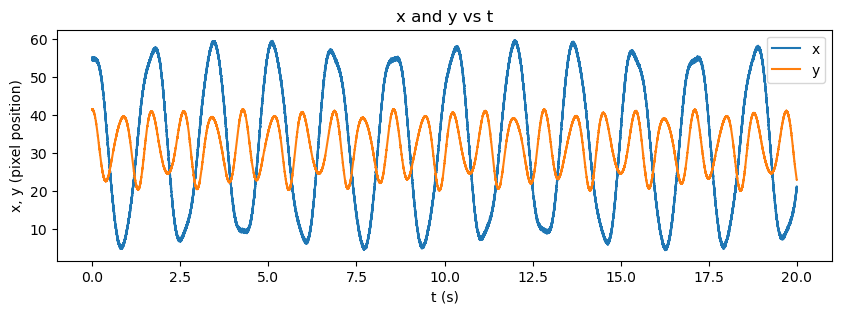

In [13]:
# plot x against t, y against t, on the same figure no subplots
plt.figure(figsize=(10, 3))
plt.plot(t_all, x_all, label='x')
plt.plot(t_all, y_all, label='y')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x, y (pixel position)')
plt.title('x and y vs t')
plt.show()

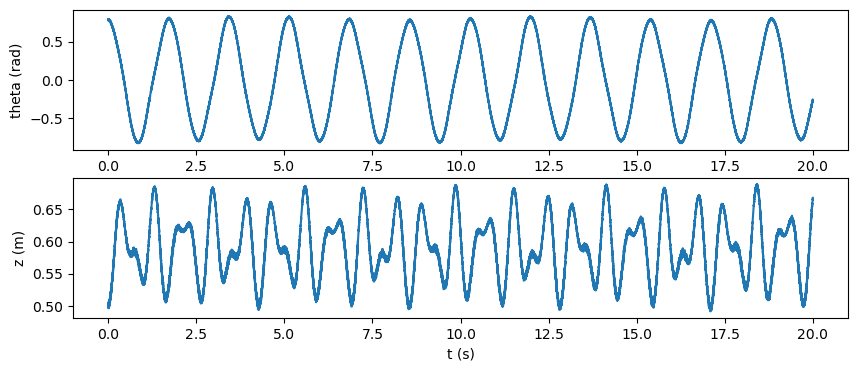

In [14]:
# plot theta and z against t (in seconds), in two subplots 2 rows, 1 column
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(noisy_data_df['t'], noisy_data_df['theta'])
plt.ylabel('theta (rad)')
plt.subplot(2, 1, 2)
plt.plot(noisy_data_df['t'], noisy_data_df['z'])
plt.ylabel('z (m)')
plt.xlabel('t (s)')
plt.show()

### Add Time Wise Sampling Noise

In [15]:
# original data 10000 fps, we convert to F fps
F = 60 # fps
film_length = int(T) # seconds
selected_frame_idx = np.linspace(0, len(x)-1, F*film_length).astype(int)

# set seed for reproducibility
np.random.seed(0)

# add 1 to 10% of the selected frames at random
selected_to_add_1 = np.random.choice(range(len(selected_frame_idx)), int(len(selected_frame_idx)*0.1)).tolist()
selected_frame_idx[selected_to_add_1] = selected_frame_idx[selected_to_add_1] + 1

# add -1 to 10% of the selected frames at random
selected_to_min_1 = np.random.choice(range(len(selected_frame_idx)), int(len(selected_frame_idx)*0.1))
selected_frame_idx[selected_to_min_1] = selected_frame_idx[selected_to_min_1] - 1

# save selected data to csv
noisy_data_df.iloc[selected_frame_idx].to_csv(f'noisy_data_{F}_fps.csv', index=False)

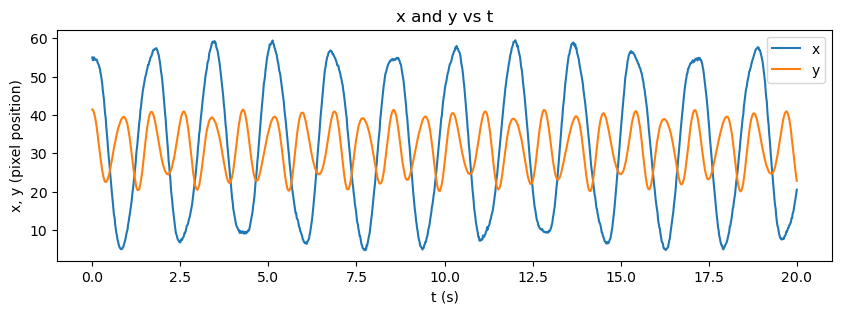

In [16]:
# plot x against t, y against t, on the same figure no subplots
plt.figure(figsize=(10, 3))
plt.plot(t_all[selected_frame_idx], x_all[selected_frame_idx], label='x')
plt.plot(t_all[selected_frame_idx], y_all[selected_frame_idx], label='y')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x, y (pixel position)')
plt.title('x and y vs t')
plt.show()

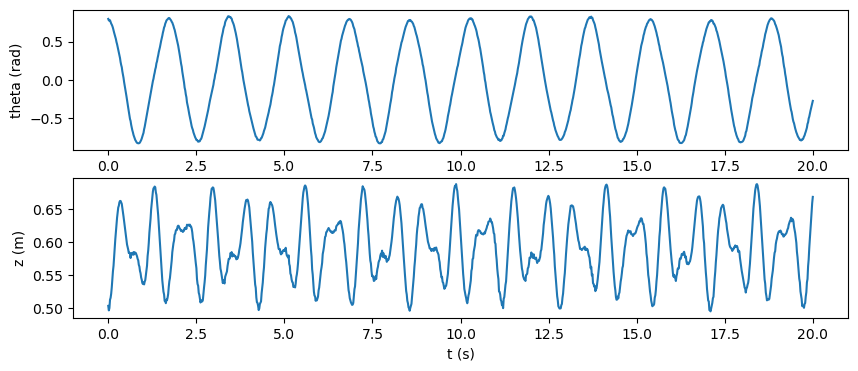

In [17]:
# plot theta and z against t (in seconds), in two subplots 2 rows, 1 column
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t_all[selected_frame_idx], theta_all[selected_frame_idx])
plt.ylabel('theta (rad)')
plt.subplot(2, 1, 2)
plt.plot(t_all[selected_frame_idx], z_all[selected_frame_idx])
plt.ylabel('z (m)')
plt.xlabel('t (s)')
plt.show()